In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport special
%aimport optim
%aimport lossfuncs

## n2

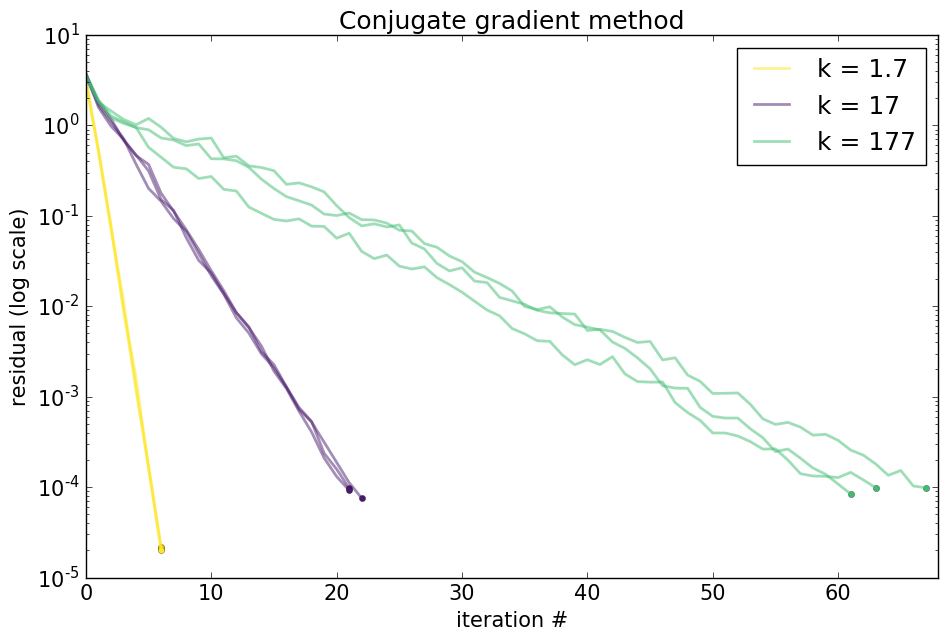

In [4]:
n = 1000
m = 0
matr_num = 3
plt.figure(figsize=(11, 7))
plt.rcParams.update({'font.size': 15})
for k in [1.7, 17, 177]:
    for i in range(matr_num):
        A = special.gen_symm_matr(k, n)
        b = np.random.randn(n)

        ans = optim.cg(lambda x: np.dot(A, x), b, np.zeros(n), trace=True)
        y = ans[2]['norm_r']

        plt.semilogy(y, label='k = %s' % k if i == 0 else "",
                     c=cm.viridis(k), linewidth=2, alpha=0.5)
        
        plt.scatter([y.size - 1], y[-1], c=cm.viridis(k), linewidths=0.2)
        
        m = max(m, y.size)

plt.title('Conjugate gradient method')
plt.xlim((0, m))
plt.xlabel('iteration #')
plt.ylabel('residual (log scale)')
plt.legend(loc='best', )
plt.savefig("pics/cg", bbox_inches='tight')
plt.show()

## n4

In [5]:
def logloss(w, X, y, reg_coef):
    A = -y[:, np.newaxis] * X
    return np.logaddexp(0, A.dot(w)).mean() + reg_coef * np.dot(w, w) / 2

In [6]:
n = 100
d = 10
k = 3
w = np.random.rand(k, d)
X = np.random.rand(n, d)
# X[X > 0.1] = 0
y = np.ones(n)
y[np.random.rand(n) > 0.5] = -1

In [7]:
for i in range(k):
    tmp1 = lossfuncs.logistic(w[i], X, y, 1)
    tmp2 = special.grad_finite_diff(lambda x: logloss(x, X, y, 1), w[i])
    print(np.sum(tmp1[1] - tmp2) < 1e-7)

True
True
False


In [8]:
for i in range(k):
    v = np.random.rand() * w[i]
    tmp1 = lossfuncs.logistic_hess_vec(w[i], v, X, y, 1)
    tmp2 = special.hess_vec_finite_diff(lambda x: logloss(x, X, y, 1), w[i], v)
    print(np.sum(tmp1 - tmp2) < 1e-4)

True
True
True


## n5

In [9]:
n = 10
matr_num = 3
k = 17
A = special.gen_symm_matr(k, n)
b = np.random.randn(n)

def func(x):
    return (
        0.5 * x.dot(A.dot(x)) - x.dot(b),
        A.dot(x) - b
    )

def hess_vec(x, v):
    return np.dot(A, v)

exact = np.linalg.solve(A, b)
ans1 = optim.cg(lambda x: hess_vec(0, x), b, np.zeros(n))
ans2 = optim.ncg(func, np.zeros(n))
ans3 = optim.lbfgs(func, np.zeros(n))
ans4 = optim.hfn(func, np.zeros(n), hess_vec)

In [10]:
exact

array([-0.44384514,  0.79898969,  0.20121204, -0.20970576, -0.92702148,
       -0.02319373,  0.16420602,  0.13051301, -0.41584144, -0.17679313])

In [11]:
ans1

(array([-0.44384474,  0.79898679,  0.20121356, -0.20970557, -0.92702153,
        -0.0231929 ,  0.16420698,  0.13051426, -0.41584519, -0.17679494]), 0)

In [12]:
ans2

(array([-0.44384474,  0.79898679,  0.20121356, -0.20970557, -0.92702153,
        -0.0231929 ,  0.16420698,  0.13051426, -0.41584519, -0.17679494]),
 -1.4082373551179208,
 0)

In [13]:
ans3

(array([-0.44384903,  0.79899281,  0.20121163, -0.20971059, -0.92702035,
        -0.02318887,  0.16420726,  0.13051188, -0.41584727, -0.17679197]),
 -1.4082373550136047,
 0)

In [14]:
ans4

(array([-0.44384481,  0.79898952,  0.2012113 , -0.20970702, -0.92702201,
        -0.02319618,  0.16420607,  0.13051407, -0.41584153, -0.1767927 ]),
 -1.4082373551502019,
 0)

In [15]:
def rosenbrock(x):
    x, y = x
    return (
        (1 - x) ** 2 + 100 * (y - x ** 2) ** 2,
        np.array([2 * x * (1 - 200 * (y - x ** 2)) - 2,
                  200 * (y - x ** 2)])
    )

def rosenbrock_hess(x, v):
    x, y = x
    return (
        np.array([
            [1200 * x ** 2 - 400 * y + 2, -400 * x],
            [-400 * x, 200],
        ]).dot(v)
    )

x, f, st, hist = optim.hfn(rosenbrock, np.array([10.0, 20.0]), rosenbrock_hess, trace=True)
x, f, st, hist['norm_g'].size

(array([ 0.99999452,  0.99998903]), 3.0037442119256261e-11, 0, 48)

## n6

In [16]:
from sklearn.datasets import load_svmlight_file

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

In [18]:
from scipy.optimize import minimize

In [19]:
X_data, y_data = dict(), dict()
X_data['train'], y_data['train'] = dict(), dict()
X_data['test'], y_data['test'] = dict(), dict()

In [20]:
def read_dset(path, postf=''):
    n_f = 123 if name == "a7a" else None
    
    X, y = load_svmlight_file(path + postf, n_features=n_f)
    X = normalize(X)
    if y.min() > -0.5:
        y = 2 * (y - 0.5)
        
    return X, y

In [21]:
names_low = ["a7a", "madelon", "svmguide1"]
for name in names_low:
    X_data['train'][name], y_data['train'][name] = read_dset("data/low/" + name)
    X_data['test'][name], y_data['test'][name] = read_dset("data/low/" + name, ".t")

names_high = ["leu", "gisette_scale", "rcv1"]
for name in names_high:
    X_data['train'][name], y_data['train'][name] = read_dset("data/high/" + name)
    X_data['test'][name], y_data['test'][name] = read_dset("data/high/" + name, ".t")

In [22]:
# name = 'rcv1'
# X_tr, y_tr = X['train'][name], y['train'][name]
# n, d = X_tr.shape
# func = lambda x: lossfuncs.logistic(x, X_tr, y_tr, 1 / n)
# hess = lambda x, v: lossfuncs.logistic_hess_vec(x, v, X_tr, y_tr, 1 / n)
# tmp = optim.ncg(func, np.zeros(d, dtype=np.float)) #, hess)

# y_te = y['test'][name]
# accuracy_score(y_te, np.sign(X['test'][name].dot(tmp[0])))

In [23]:
res = dict()
for k, name in enumerate(names_low + names_high):
    X_tr = X_data['train'][name]
    n, d = X_tr.shape
    
    def func(x):
        return lossfuncs.logistic(x, X_tr, y_data['train'][name], 1 / n)
    def hess(x, v):
        return lossfuncs.logistic_hess_vec(x, v, X_tr, y_data['train'][name], 1 / n)
    
    res[name] = dict()
    
    x0 = np.zeros(d, dtype=np.float)
    res[name]['ncg'] = optim.ncg(func, x0, trace=True)
    res[name]['lbfgs'] = optim.lbfgs(func, x0, trace=True)
    res[name]['hfn'] = optim.hfn(func, x0, hess, trace=True)
    res[name]['opt'] = optim.ncg(func, x0, tol=1e-8, max_iter=3000, trace=True)

/home/ospanoff/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ospanoff/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


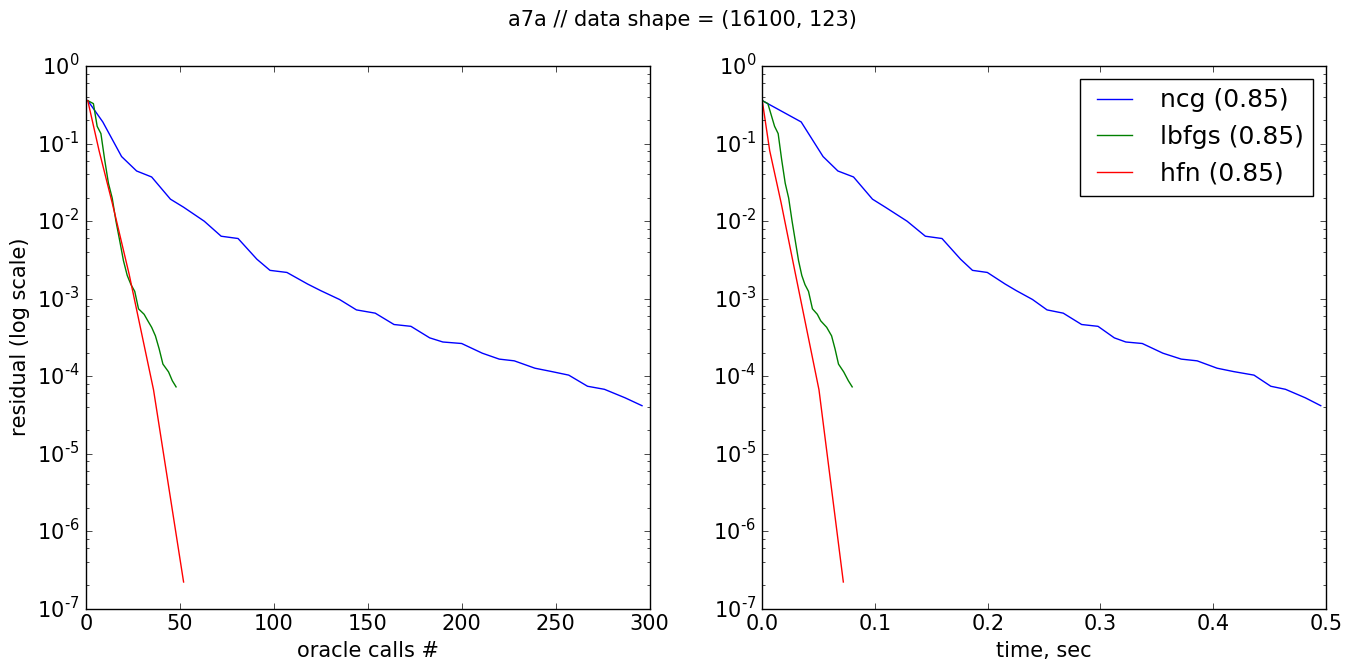

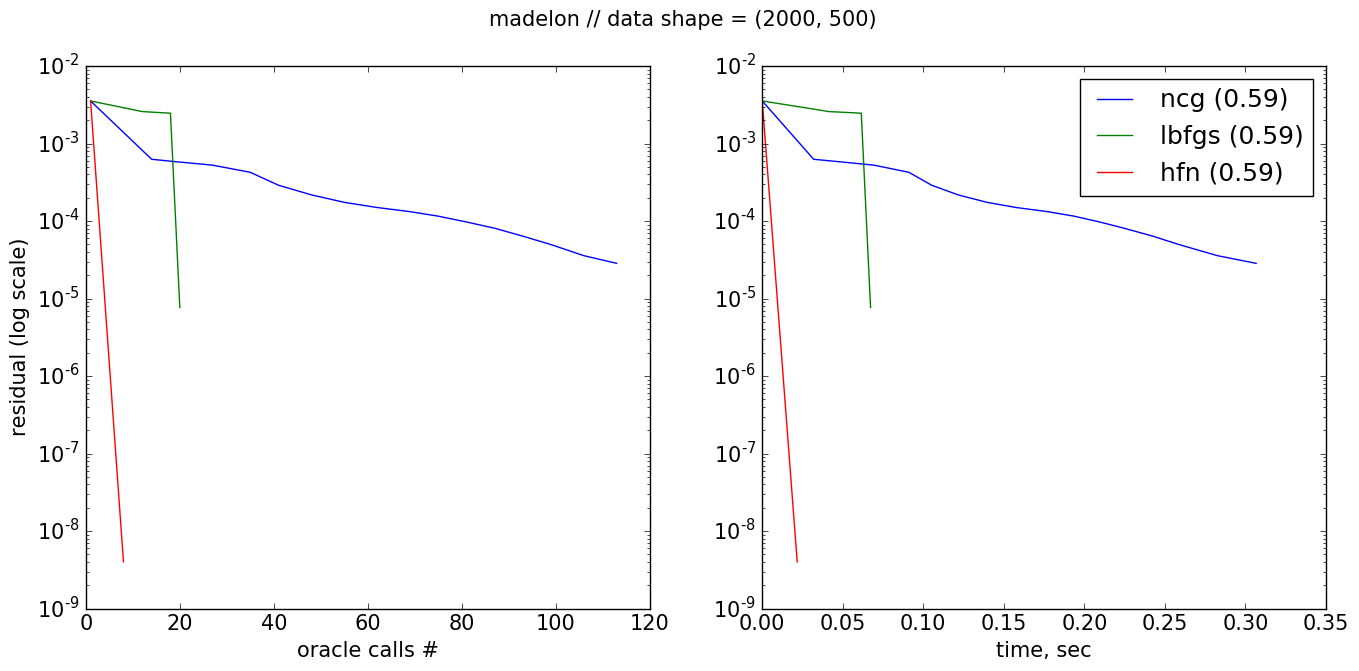

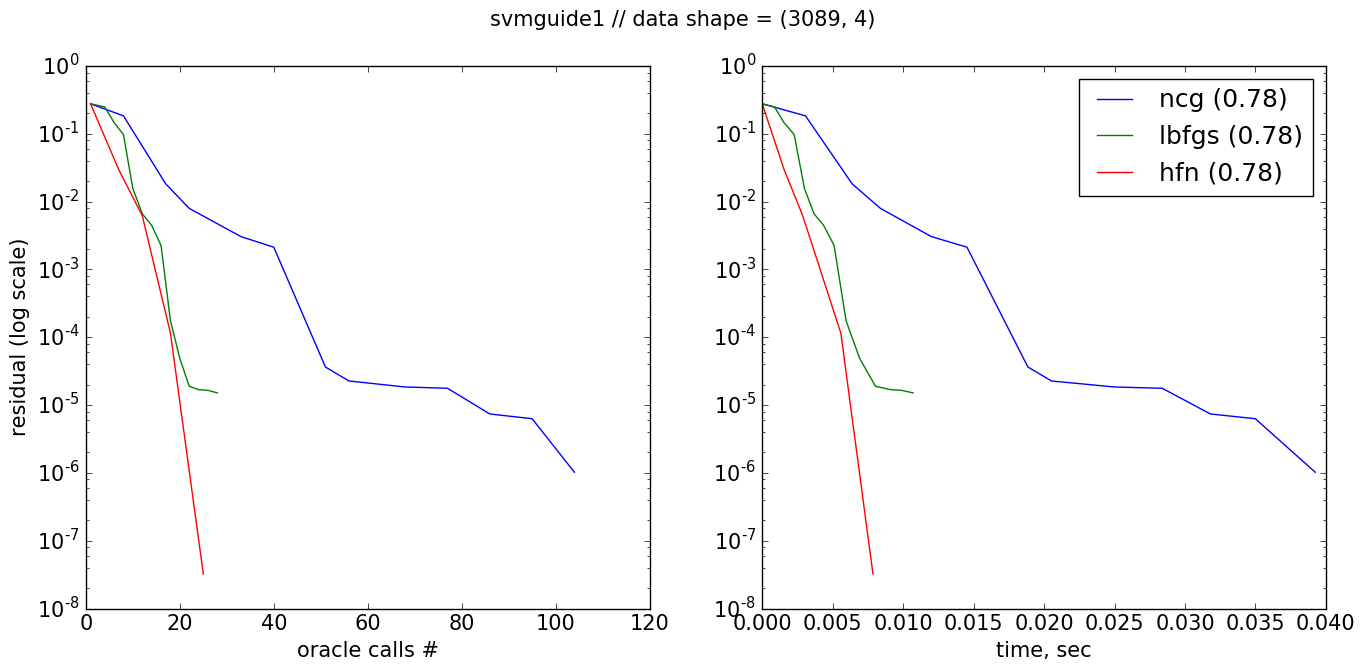

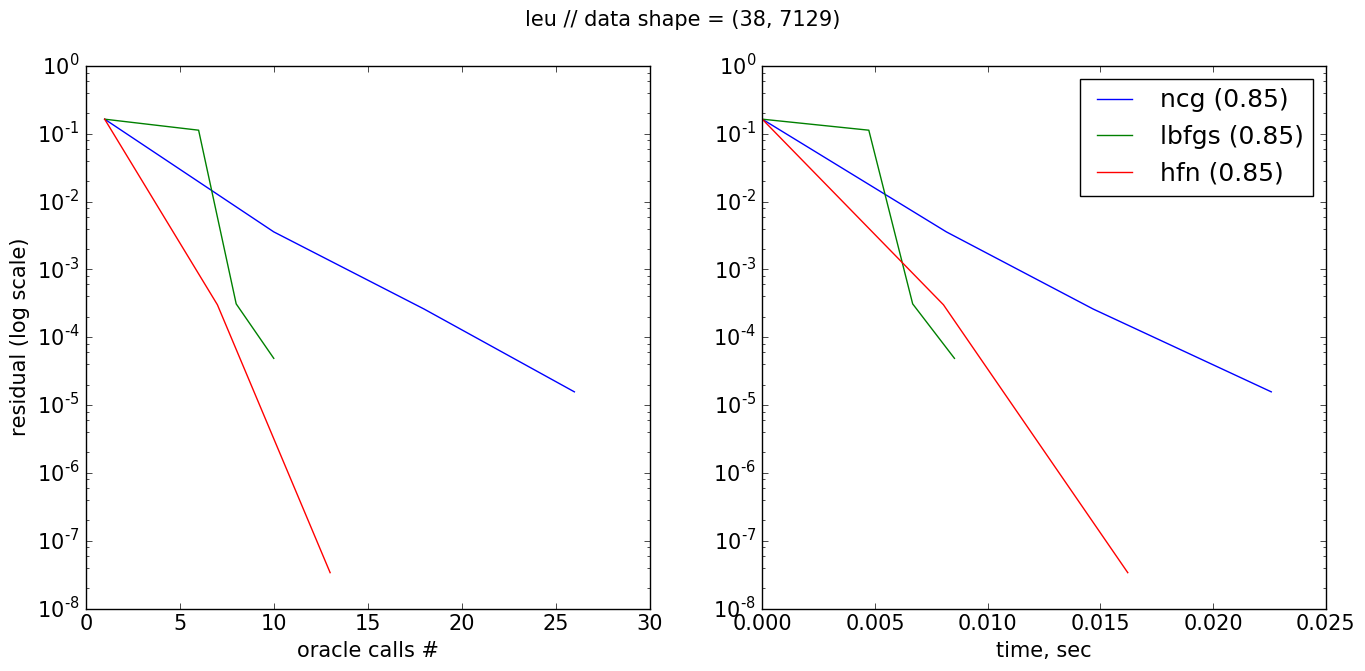

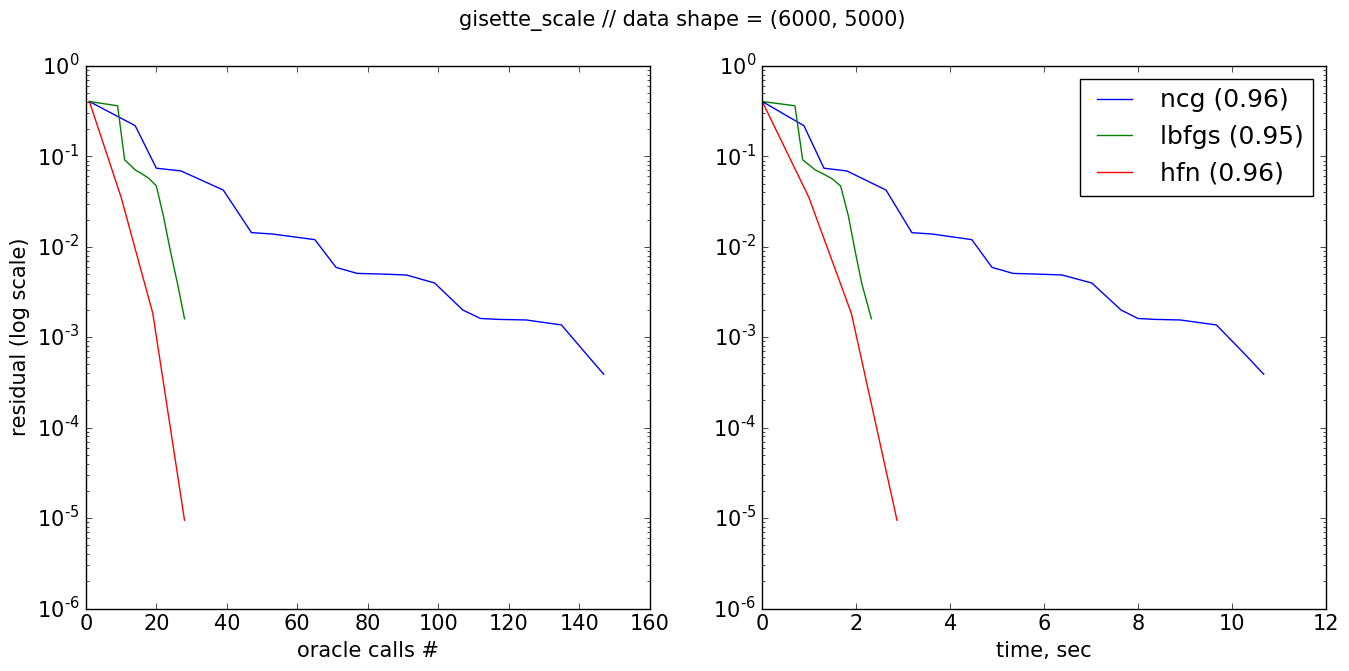

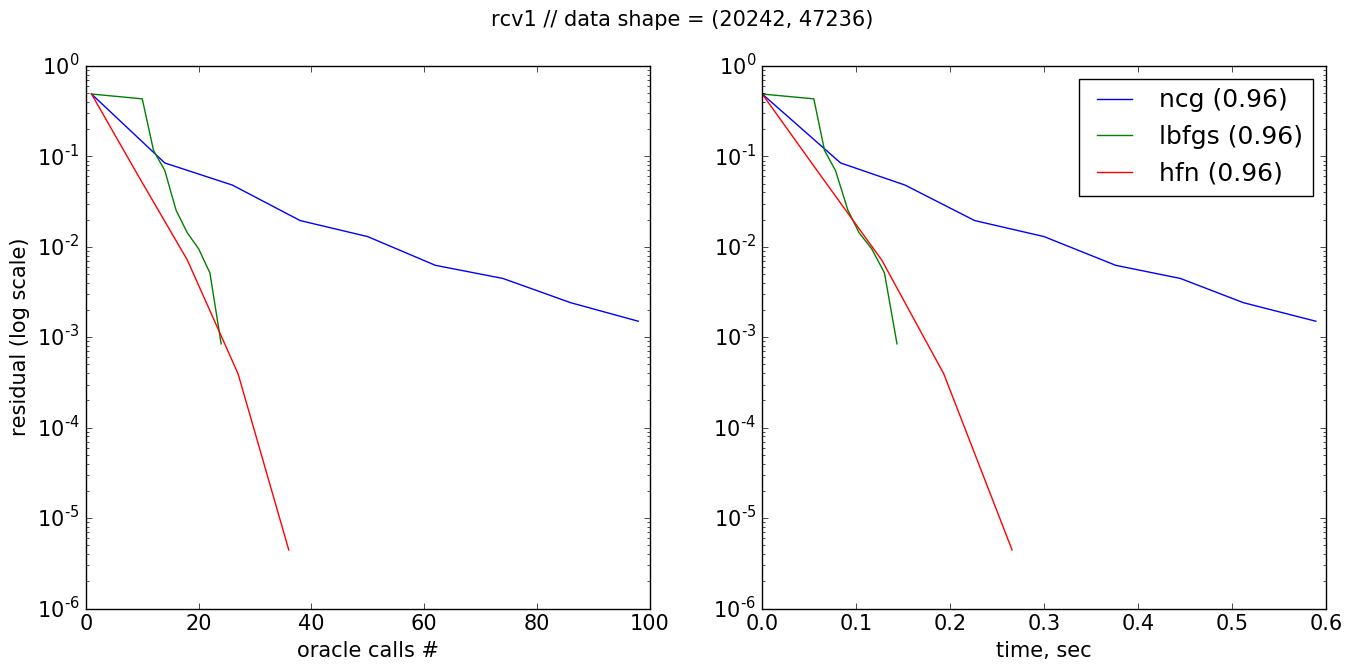

In [25]:
plt.rcParams.update({'font.size': 15})
for name in names_low + names_high:
    plt.figure(figsize=(16, 7))
    for meth in ['ncg', 'lbfgs', 'hfn']:
        w, f, _, h = res[name][meth]
        f_opt = res[name]['opt'][1]

        x = h['n_evals']
        x_t = h['elaps_t']
        y = np.abs(h['f'] - f_opt)

        y_pred = np.sign(X_data['test'][name].dot(w))
        score = accuracy_score(y_data['test'][name], y_pred)
        
        plt.subplot(121)
        plt.semilogy(x, y, label="%s (%0.2f)" % (meth, score))
        plt.xlabel('oracle calls #')
        plt.ylabel('residual (log scale)')
        
        plt.subplot(122)
        plt.semilogy(x_t, y, label="%s (%0.2f)" % (meth, score)) 
        plt.xlabel('time, sec')
#         plt.ylabel('residual (log scale)')
    
    plt.suptitle("%s // data shape = %s " % (name, X_data['train'][name].shape))
    plt.legend(loc='best')

    plt.savefig("pics/" + name, bbox_inches='tight')
    plt.show()